In [9]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename


In [10]:
wr124 = fits.open(r"C:\Users\Abhim\Desktop\MAST_2023-07-17T1212\JWST\jw02730-o002_t013_miri_f1800w\jw02730-o002_t013_miri_f1800w_i2d.fits")

In [11]:
wr124

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002067C7326B0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020610635540>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000206106357E0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020610635A20>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020610635C90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000206106354E0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020610635CF0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020610635F30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000020610636170>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000020610636230>]

In [12]:
wr124.info()

Filename: C:\Users\Abhim\Desktop\MAST_2023-07-17T1212\JWST\jw02730-o002_t013_miri_f1800w\jw02730-o002_t013_miri_f1800w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     349   ()      
  1  SCI           1 ImageHDU        75   (1734, 1163)   float32   
  2  ERR           1 ImageHDU        10   (1734, 1163)   float32   
  3  CON           1 ImageHDU        10   (1734, 1163, 1)   int32   
  4  WHT           1 ImageHDU         9   (1734, 1163)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (1734, 1163)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (1734, 1163)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (1734, 1163)   float32   
  8  HDRTAB        1 BinTableHDU    824   16R x 407C   [23A, 5A, 3A, 48A, 7A, 13A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 32A, 21A, 3A, 3A, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 12A, 18A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 9A, 9A, 5A, D, D, 

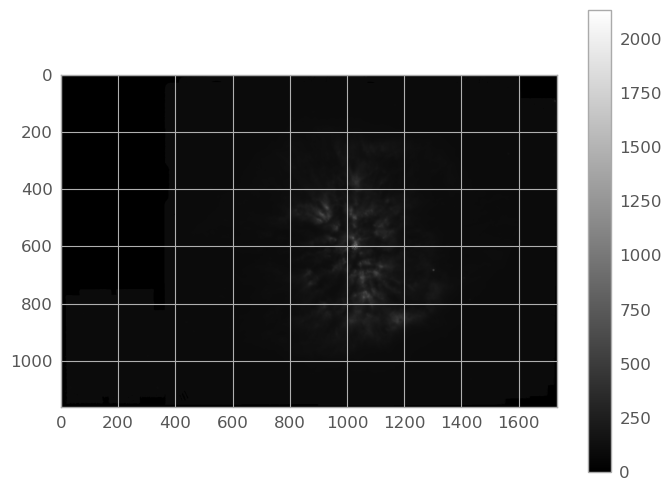

In [13]:
data = wr124[1].data
data.shape

plt.imshow (data,cmap = "gray")
plt.colorbar()

[Text(1, 100.0, '100'), Text(1, 500.0, '500'), Text(1, 1000.0, '1000')]

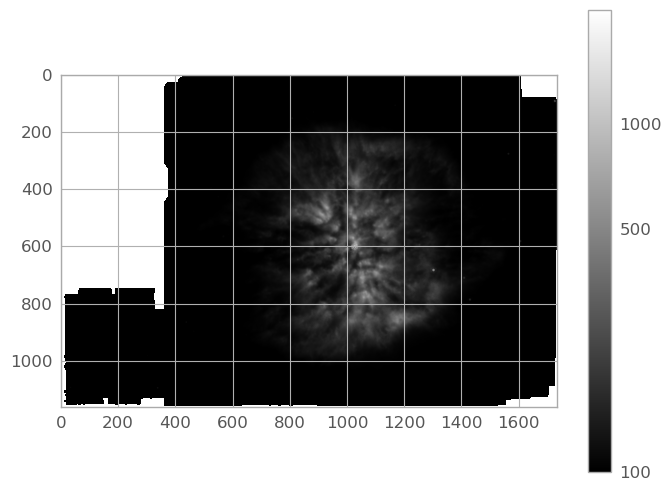

In [14]:
from matplotlib.colors import LogNorm

plt.imshow(data, cmap='gray', norm=LogNorm(100))
cbar = plt.colorbar(ticks=[1.e2,5.e2,1.e3])
cbar.ax.set_yticklabels(['100','500','1000'])

In [15]:
from astropy.visualization import make_lupton_rgb

r = fits.open (r"C:\Users\Abhim\Desktop\MAST_2023-07-17T1212\JWST\jw02730-o002_t013_miri_f1800w\jw02730-o002_t013_miri_f1800w_i2d.fits")[1].data
g = fits.open (r"C:\Users\Abhim\Desktop\MAST_2023-07-17T1218\JWST\jw02730-o002_t013_miri_f770w\jw02730-o002_t013_miri_f770w_i2d.fits")[1].data
b = fits.open (r"C:\Users\Abhim\Desktop\MAST_2023-07-17T1225\JWST\jw02730-o002_t013_miri_f1280w\jw02730-o002_t013_miri_f1280w_i2d.fits")[1].data

print(r.shape)
print(g.shape)
print(b.shape)

r = r[:1100,420:1580]
g = g[:1100,420:1580]
b = b[:1100,420:1580]

print(r.shape)
print(g.shape)
print(b.shape)

(1163, 1734)
(1163, 1734)
(1163, 1734)
(1100, 1160)
(1100, 1160)
(1100, 1160)


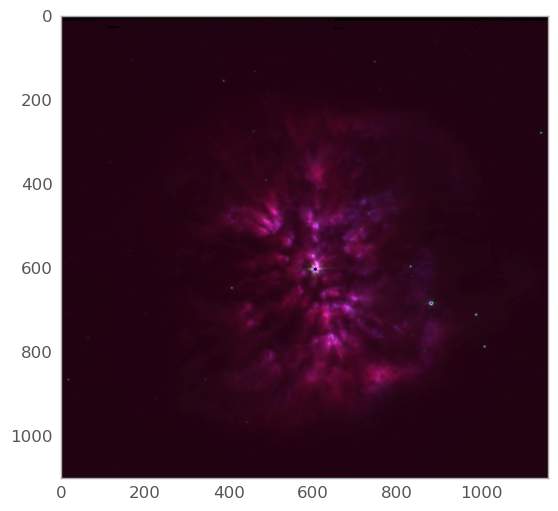

In [16]:
import cv2

img = make_lupton_rgb (r*(29), g*(42), b*(56), stretch = 48000, Q = 1)

final = cv2.convertScaleAbs(img, 1000, 2.3)

plt.grid(False)
plt.imshow (final)

plt.savefig('wr124.png')
